In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 10,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   #"hessian_percentile" : 95,
                   #"grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 300,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-2, 5e-2),
                "num_epochs" : (3,3),
                #"tau" : (0.999, 0.9991),
                "ewc_lambda" : (200,200)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(3)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-08-13 19:12:28,000] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-08-13 19:12:28 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 56.70it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.9854
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1016
100%|██████████| 94/94 [00:01<00:00, 66.96it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4625
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1031
100%|██████████| 94/94 [00:01<00:00, 67.14it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4490
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1012
-- >> End of training phase << --


[I 2024-08-13 19:12:39,297] Trial 0 finished with value: 10.387813333333341 and parameters: {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}. Best is trial 0 with value: 10.387813333333341.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 63.44it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.8279
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1059
100%|██████████| 94/94 [00:01<00:00, 64.74it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4301
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.0994
100%|██████████| 94/94 [00:01<00:00, 65.22it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4312
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.0958
-- >> End of training phase << --


[I 2024-08-13 19:12:49,034] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-08-13 19:12:49 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 64.92it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.3737
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2029
100%|██████████| 94/94 [00:01<00:00, 63.93it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.9221
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2796
100%|██████████| 94/94 [00:01<00:00, 64.85it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.8565
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3152
-- >> End of training phase << --


[I 2024-08-13 19:13:02,771] Trial 0 finished with value: 24.459600000000002 and parameters: {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}. Best is trial 0 with value: 24.459600000000002.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 64.03it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.3241
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2077
100%|██████████| 94/94 [00:01<00:00, 63.96it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.9138
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2790
100%|██████████| 94/94 [00:01<00:00, 63.50it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.8025
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3242
-- >> End of training phase << --


[I 2024-08-13 19:13:12,494] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-08-13 19:13:12 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 54.97it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.8580
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1477
100%|██████████| 94/94 [00:01<00:00, 55.56it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.5225
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1785
100%|██████████| 94/94 [00:01<00:00, 58.81it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.5315
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1832
-- >> End of training phase << --


[I 2024-08-13 19:13:30,787] Trial 0 finished with value: 22.41395555555557 and parameters: {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}. Best is trial 0 with value: 22.41395555555557.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 57.45it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.8925
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1663
100%|██████████| 94/94 [00:01<00:00, 58.12it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4346
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2597
100%|██████████| 94/94 [00:01<00:00, 56.97it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.2135
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3230
-- >> End of training phase << --


[I 2024-08-13 19:13:40,916] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-08-13 19:13:40 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 57.68it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.2171
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1918
100%|██████████| 94/94 [00:01<00:00, 57.14it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.7099
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2309
100%|██████████| 94/94 [00:01<00:00, 56.89it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.6876
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2407
-- >> End of training phase << --


[I 2024-08-13 19:14:02,303] Trial 0 finished with value: 23.63136666666666 and parameters: {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}. Best is trial 0 with value: 23.63136666666666.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 57.49it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.1356
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2070
100%|██████████| 94/94 [00:01<00:00, 57.04it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.7661
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2263
100%|██████████| 94/94 [00:01<00:00, 59.89it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.6842
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2275
-- >> End of training phase << --


[I 2024-08-13 19:14:12,261] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-08-13 19:14:12 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 55.81it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.4635
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2687
100%|██████████| 94/94 [00:01<00:00, 57.88it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.0433
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3279
100%|██████████| 94/94 [00:01<00:00, 58.08it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.8708
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3448
-- >> End of training phase << --


[I 2024-08-13 19:14:38,056] Trial 0 finished with value: 24.34668266666667 and parameters: {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}. Best is trial 0 with value: 24.34668266666667.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 54.78it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.4344
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2037
100%|██████████| 94/94 [00:01<00:00, 55.75it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.0972
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.2808
100%|██████████| 94/94 [00:01<00:00, 55.52it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 3.0689
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3273
-- >> End of training phase << --


## Visualize results

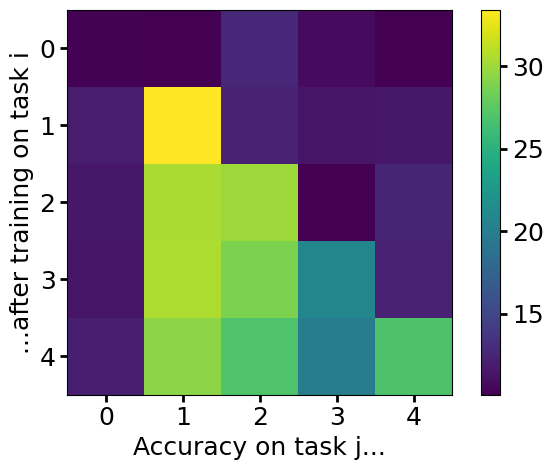

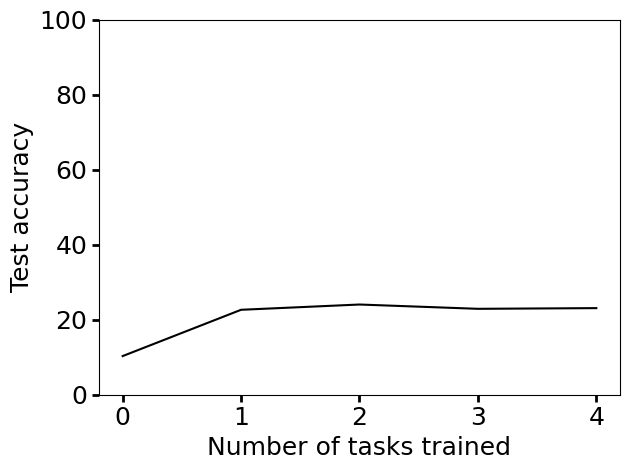

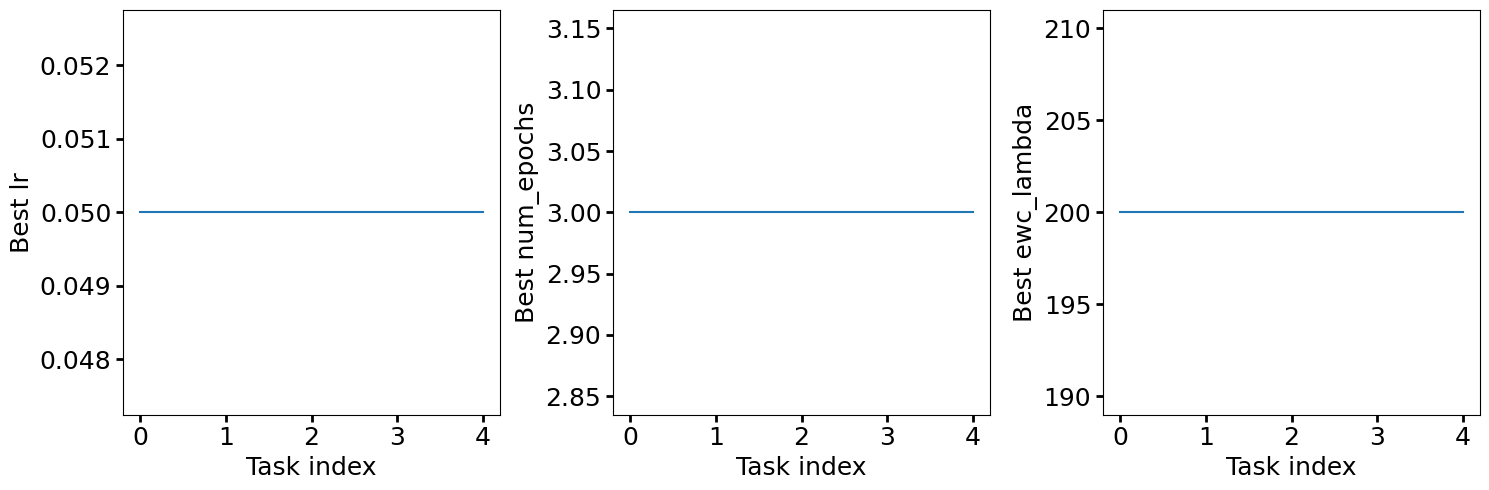

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
print(best_params_list)

[{'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}, {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}, {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}, {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}, {'lr': 0.05, 'num_epochs': 3, 'ewc_lambda': 200}]


In [11]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --
  3%|▎         | 3/94 [00:00<00:02, 39.60it/s]

100%|██████████| 94/94 [00:01<00:00, 70.34it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.8349
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1022
100%|██████████| 94/94 [00:01<00:00, 70.68it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4132
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1035
100%|██████████| 94/94 [00:01<00:00, 69.10it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4531
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1048
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 62.75it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.4869
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.1582
100%|██████████| 94/94 [00:01<00:00, 65.09it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 2.0395
	Top1_Acc_Epoch/train_phase/train_stream/Task

## Visualize validation

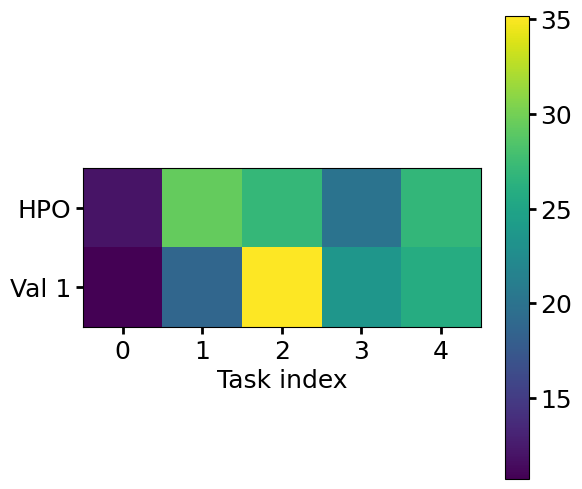

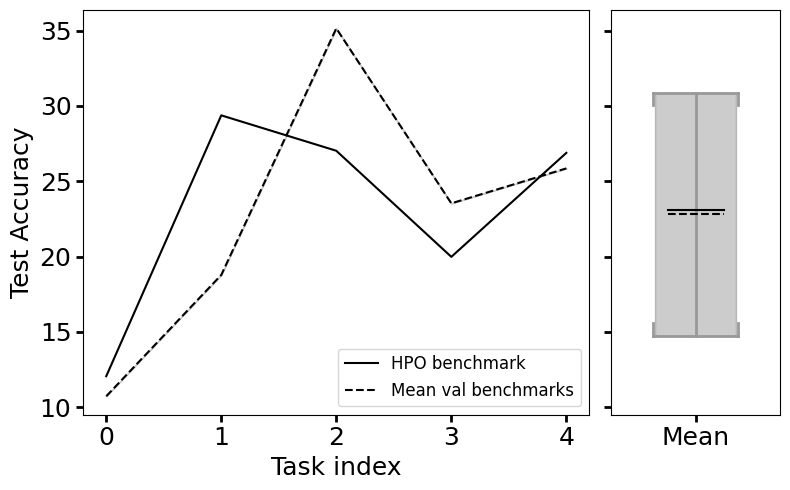

In [12]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [13]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)